In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv("/Users/ebby/Downloads/train.csv")
test=pd.read_csv("/Users/ebby/Downloads/test.csv")

In [3]:
train.head()


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
train.info()
print("_"*40)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
User_ID                       233599 non-

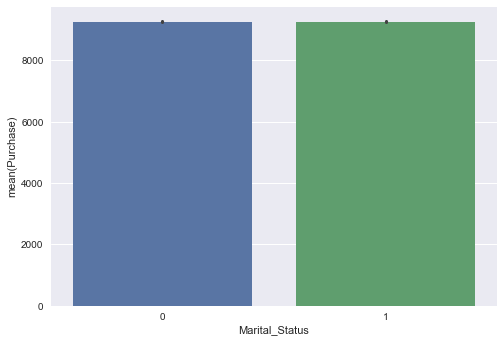

In [5]:
sns.barplot(x="Marital_Status",y="Purchase",data=train)
plt.show()

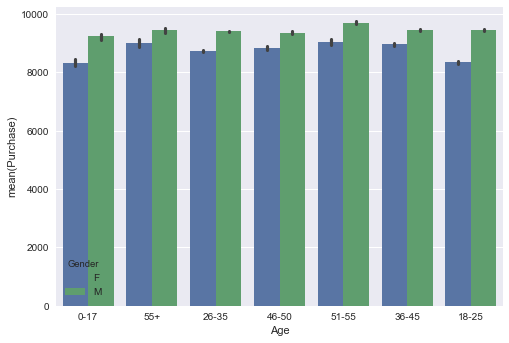

In [6]:
sns.barplot(x="Age",y="Purchase",hue="Gender",data=train)
plt.show()

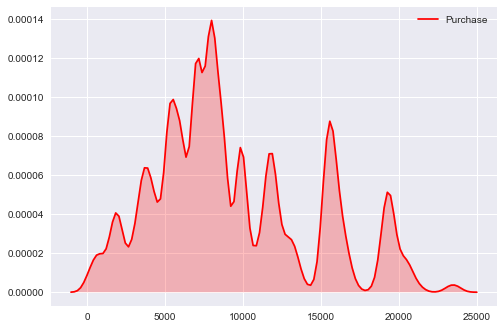

In [7]:
sns.kdeplot(train.Purchase,shade=True,color="red")
plt.show()

/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.
/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:454: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X>clip[0], X<clip[1])] # won't work for two columns.


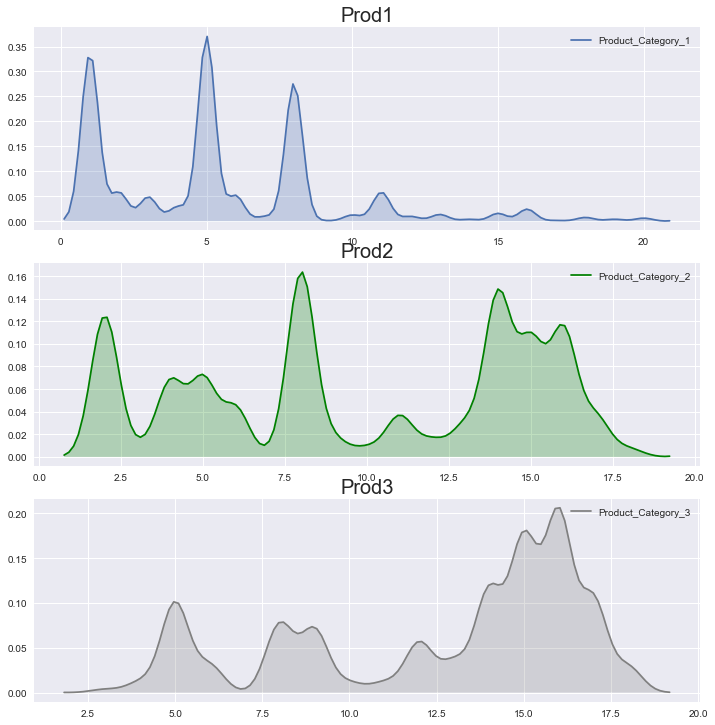

In [8]:
fig,axs=plt.subplots(15,5,figsize=(10,10))
ax1=plt.subplot2grid((15,5),(0,0),colspan=5,rowspan=5)
ax2=plt.subplot2grid((15,5),(5,0),colspan=5,rowspan=5)
ax3=plt.subplot2grid((15,5),(10,0),colspan=5,rowspan=5)
plt.tight_layout()
ax1.set_title("Prod1",fontsize=20)
ax2.set_title("Prod2",fontsize=20)
ax3.set_title("Prod3",fontsize=20)
sns.kdeplot(train.Product_Category_1,shade=True,ax=ax1)
sns.kdeplot(train.Product_Category_2,shade=True,ax=ax2,color="green")
sns.kdeplot(train.Product_Category_3,shade=True,ax=ax3,color="grey")
plt.show()


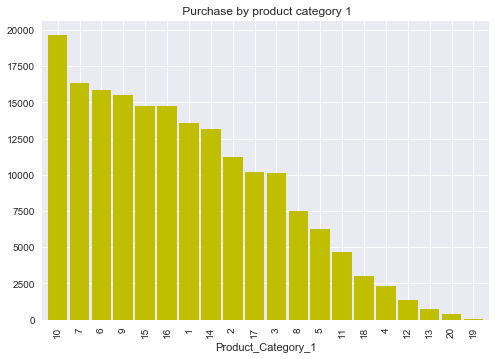

In [9]:
x=train.groupby('Product_Category_1').mean().sort_values(by='Purchase', ascending=False)["Purchase"]
x.plot('bar', color='y',width=0.9,title=' Purchase by product category 1', fontsize=10)
plt.show()

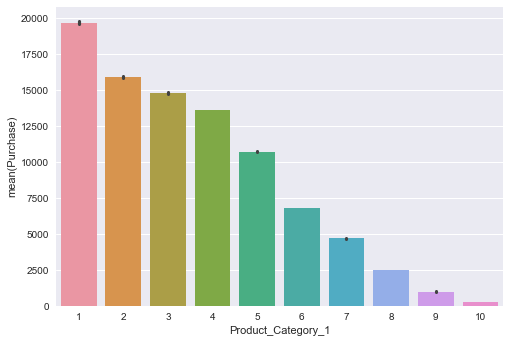

In [10]:
dictionary={"10":1,"7":2,"6":2,"9":2,"15":3,"16":3,"1":4,"14":4,"2":5,"17":5,"3":5,"8":6,"5":6,"11":7,"18":8,"4":8,"12":9,"13":9,"20":10,"19":10}
combine=[train,test]
train["Product_Category_1"]=train["Product_Category_1"].astype(str)
test["Product_Category_1"]=test["Product_Category_1"].astype(str)
for i in combine:
    i["Product_Category_1"]=i["Product_Category_1"].map(dictionary)
sns.barplot(x="Product_Category_1",y="Purchase",data=train)
plt.show()

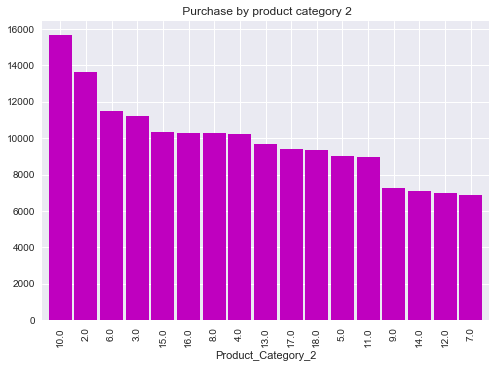

In [11]:
x=train.groupby('Product_Category_2').mean().sort_values(by='Purchase', ascending=False)["Purchase"]
x.plot('bar', color='m',width=0.9,title=' Purchase by product category 2', fontsize=10)
plt.show()

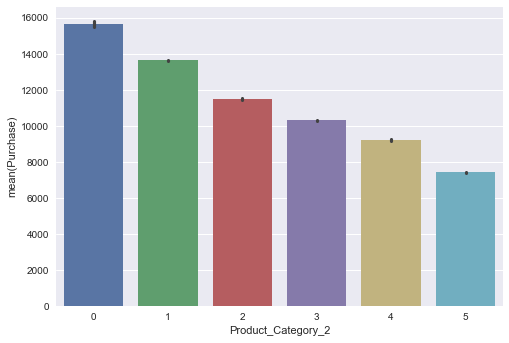

In [12]:
train["Product_Category_2"]=train["Product_Category_2"].fillna(train["Product_Category_2"].mean())
test["Product_Category_2"]=test["Product_Category_2"].fillna(test["Product_Category_2"].mean())
train["Product_Category_2"]=train["Product_Category_2"].astype(int)
test["Product_Category_2"]=test["Product_Category_2"].astype(int)

dictionary={"10":0,"2":1,"6":2,"3":2,"15":3,"16":3,"8":3,"4":3,"13":4,"17":4,"18":4,"5":4,"11":4,"9":5,"14":5,"12":5,"7":5}
train["Product_Category_2"]=train["Product_Category_2"].astype(str)
test["Product_Category_2"]=test["Product_Category_2"].astype(str)
combine=[train,test]
for i in combine:
    i["Product_Category_2"]=i["Product_Category_2"].map(dictionary)
sns.barplot(x="Product_Category_2",y="Purchase",data=train)
plt.show()

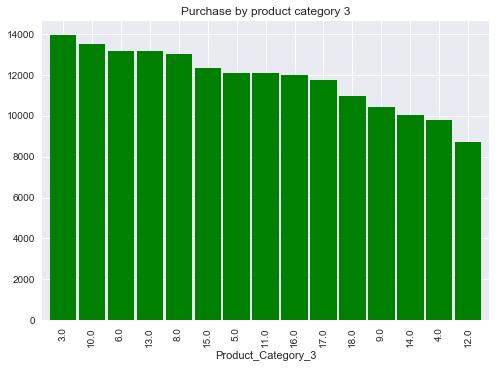

In [13]:
x=train.groupby('Product_Category_3').mean().sort_values(by='Purchase', ascending=False)["Purchase"]
x.plot('bar', color='g',width=0.9,title='Purchase by product category 3', fontsize=10)
plt.show()

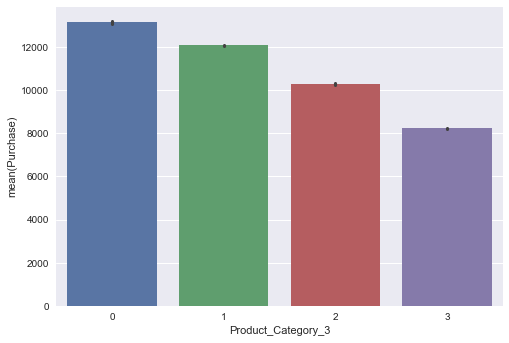

In [14]:
train["Product_Category_3"]=train["Product_Category_3"].fillna(train["Product_Category_3"].mean())
test["Product_Category_3"]=test["Product_Category_3"].fillna(test["Product_Category_3"].mean())
train["Product_Category_3"]=train["Product_Category_3"].astype(int)
test["Product_Category_3"]=test["Product_Category_3"].astype(int)

dictionary={"3":0,"10":0,"6":0,"13":0,"8":0,"15":1,"5":1,"11":1,"16":1,"17":1,"18":2,"9":2,"14":2,"4":2,"12":3}
train["Product_Category_3"]=train["Product_Category_3"].astype(str)
test["Product_Category_3"]=test["Product_Category_3"].astype(str)
combine=[train,test]
for i in combine:
    i["Product_Category_3"]=i["Product_Category_3"].map(dictionary)
sns.barplot(x="Product_Category_3",y="Purchase",data=train)
plt.show()

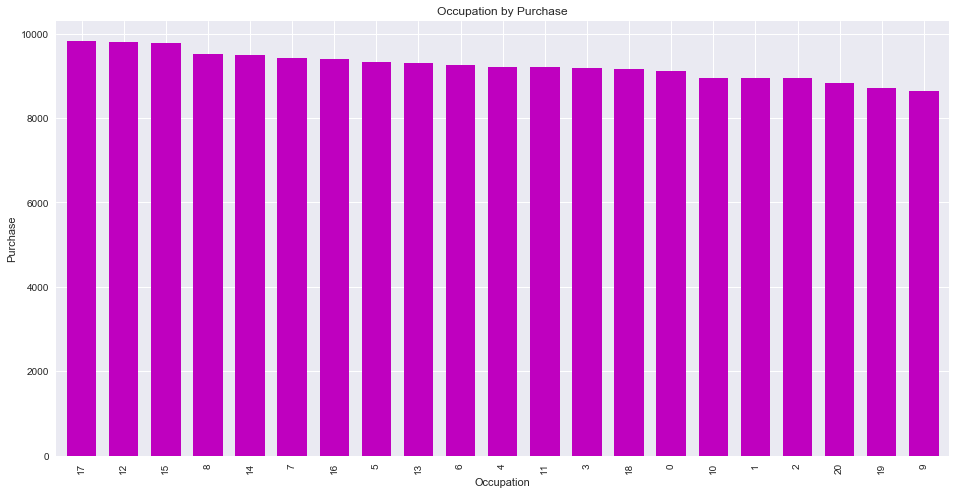

In [15]:
#pd_df = train.sort(['Purchase']).reset_index(drop=True)
#print (pd_df)
#sns.barplot(x="Occupation",y="Purchase",data=train)
#plt.show()

fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
x=train.groupby('Occupation').mean().sort_values(by='Purchase', ascending=False)['Purchase'].plot('bar', color='m',width=0.7,title='Occupation by Purchase', fontsize=10)
plt.xticks(rotation = 90)
plt.ylabel('Purchase')
plt.show()

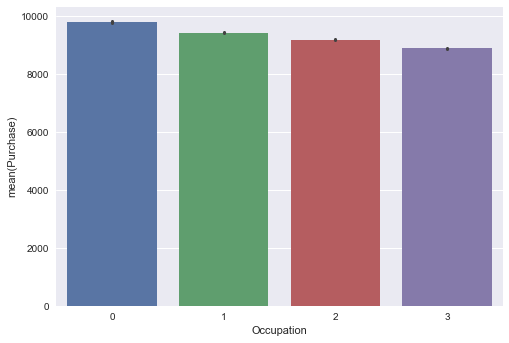

In [16]:
train["Occupation"]=train["Occupation"].astype(str)
test["Occupation"]=test["Occupation"].astype(str)
combine=[train,test]
dictionary={"17":0,"12":0,"15":0,"8":1,"14":1,"7":1,"16":1,"5":2,"13":2,"6":2,"4":2,"11":2,"3":2,"18":2,"0":2,"10":3,"1":3,"2":3,"20":3,"19":3,"9":3}
for i in combine:
    i["Occupation"]=i["Occupation"].map(dictionary)
sns.barplot(x="Occupation",y="Purchase",data=train)
plt.show()


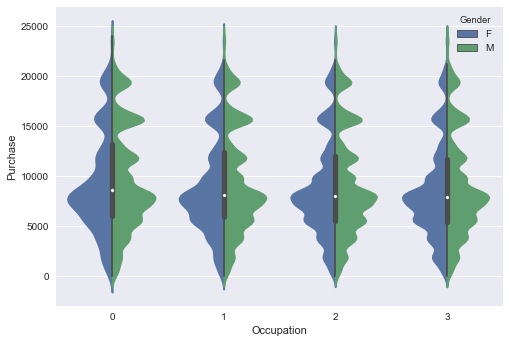

In [17]:
sns.violinplot(x="Occupation",y="Purchase",hue="Gender",split=True,data=train)
plt.show()

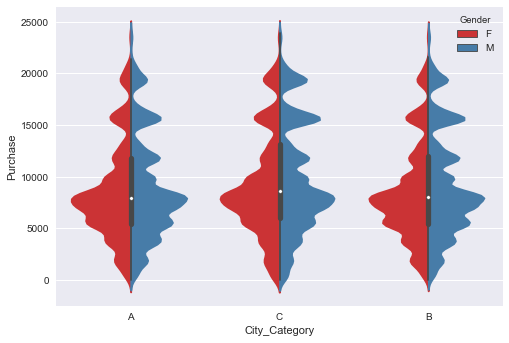

In [18]:
sns.violinplot(x="City_Category",y="Purchase",hue="Gender",palette="Set1",split=True,data=train)
plt.show()

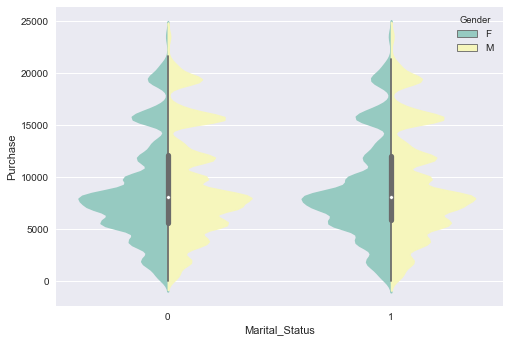

In [19]:
sns.violinplot(x="Marital_Status",y="Purchase",hue="Gender",split=True,palette="Set3",data=train)
plt.show()

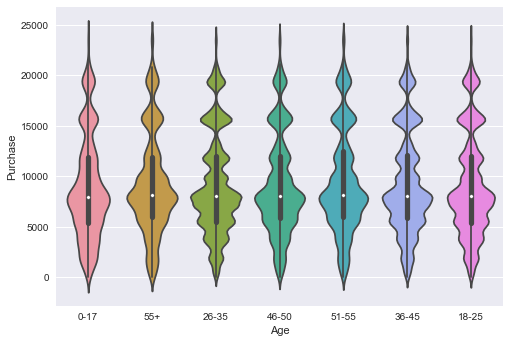

In [20]:
sns.violinplot(x="Age",y="Purchase",data=train)
plt.show()

In [21]:
train["new_status"]=train["Occupation"]
test["new_status"]=test["Occupation"]
train.head()
combine=[train,test]
for data in combine:
    data.loc[(data["Marital_Status"]==0),"new_status"]=data["new_status"]
    data.loc[(data["Marital_Status"]==1) ,"new_status"]=data["new_status"]+21


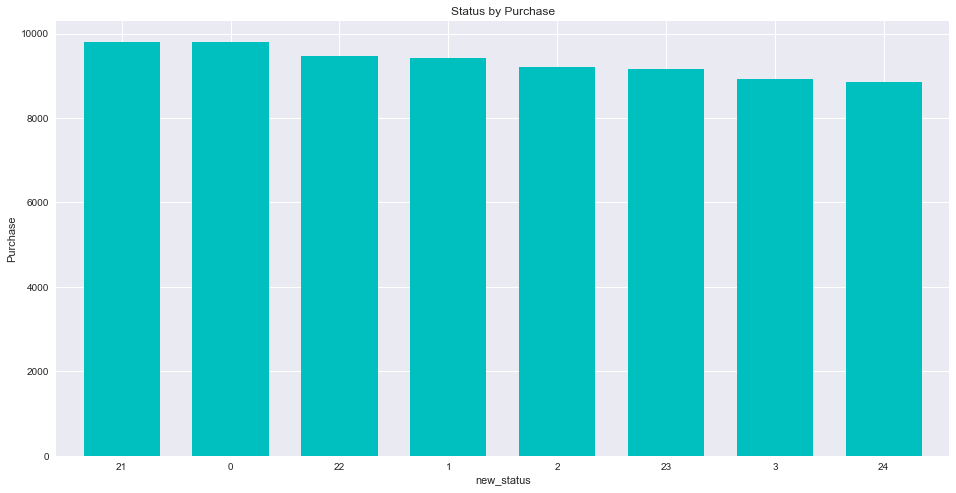

In [22]:
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
x=train.groupby('new_status').mean().sort_values(by='Purchase', ascending=False)['Purchase'].plot('bar', color='c',width=0.7,title='Status by Purchase', fontsize=10)
plt.xticks(rotation = 0)
plt.ylabel('Purchase')
plt.show()

In [23]:
train=train.drop(["new_status"],axis=1)
test=test.drop(["new_status"],axis=1)

In [24]:
#train["Product_Category_2"]=train["Product_Category_2"].fillna(train["Product_Category_2"].mean())
#test["Product_Category_2"]=test["Product_Category_2"].fillna(test["Product_Category_2"].mean())
#train["Product_Category_3"]=train["Product_Category_3"].fillna(train["Product_Category_3"].mean())
#test["Product_Category_3"]=test["Product_Category_3"].fillna(test["Product_Category_3"].mean())
#test.head()

In [25]:
#train=train.drop(["Product_Category_3","Product_Category_2"],axis=1)
#test=test.drop(["Product_Category_3","Product_Category_2"],axis=1)
#train["Product_Category_2"]=train["Product_Category_2"].astype(int)
#test["Product_Category_2"]=test["Product_Category_2"].astype(int)

train["Product_Category_3"]=train["Product_Category_3"].astype(int)
test["Product_Category_3"]=test["Product_Category_3"].astype(int)
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,3,A,2,0,5,5,3,8370
1,1000001,P00248942,F,0-17,3,A,2,0,4,2,2,15200
2,1000001,P00087842,F,0-17,3,A,2,0,9,5,3,1422
3,1000001,P00085442,F,0-17,3,A,2,0,9,5,3,1057
4,1000002,P00285442,M,55+,1,C,4+,0,6,5,3,7969


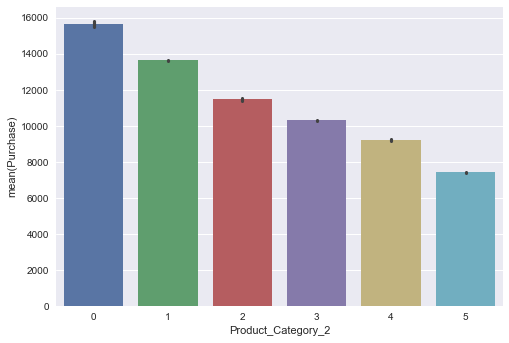

In [26]:
sns.barplot(x="Product_Category_2",y="Purchase",data=train)
plt.show()

In [27]:
train=train.drop(["Product_ID"],axis=1)
#test=test.drop(["Product_ID"],axis=1)
#train.head()

In [28]:
dictionary= {"F":1,"M":2}
combine=[train,test]
for i in combine:
    i["Gender"]=i["Gender"].map(dictionary)
train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,1,0-17,3,A,2,0,5,5,3,8370
1,1000001,1,0-17,3,A,2,0,4,2,2,15200
2,1000001,1,0-17,3,A,2,0,9,5,3,1422
3,1000001,1,0-17,3,A,2,0,9,5,3,1057
4,1000002,2,55+,1,C,4+,0,6,5,3,7969


In [29]:
train["marriage_gender"]=train["Gender"]
test["marriage_gender"]=test["Gender"]
train.head()
combine=[train,test]
for data in combine:
    data.loc[(data["Marital_Status"]==0) & (data["Gender"]==1),"marriage_gender"]=0
    data.loc[(data["Marital_Status"]==0) & (data["Gender"]==2),"marriage_gender"]=1
    data.loc[(data["Marital_Status"]==1) & (data["Gender"]==1),"marriage_gender"]=2
    data.loc[(data["Marital_Status"]==1) & (data["Gender"]==2),"marriage_gender"]=3

train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,marriage_gender
0,1000001,1,0-17,3,A,2,0,5,5,3,8370,0
1,1000001,1,0-17,3,A,2,0,4,2,2,15200,0
2,1000001,1,0-17,3,A,2,0,9,5,3,1422,0
3,1000001,1,0-17,3,A,2,0,9,5,3,1057,0
4,1000002,2,55+,1,C,4+,0,6,5,3,7969,1


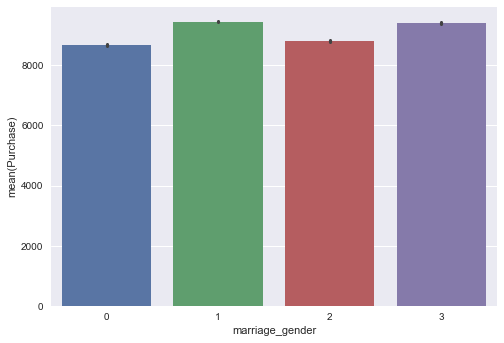

In [30]:
sns.barplot(x="marriage_gender",y="Purchase",data=train)
plt.show()

In [31]:
train["Age"].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'], dtype=object)

In [32]:
dictionary={'0-17':1, '55+':2, '26-35':3, '46-50':4, '51-55':5, '36-45':6, '18-25':7}
for i in combine:
    i["Age"]=i["Age"].map(dictionary)
train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,marriage_gender
0,1000001,1,1,3,A,2,0,5,5,3,8370,0
1,1000001,1,1,3,A,2,0,4,2,2,15200,0
2,1000001,1,1,3,A,2,0,9,5,3,1422,0
3,1000001,1,1,3,A,2,0,9,5,3,1057,0
4,1000002,2,2,1,C,4+,0,6,5,3,7969,1


In [33]:
dictionary={"A":1,"B":2,"C":3}
for i in combine:
    i["City_Category"]=i["City_Category"].map(dictionary)
train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,marriage_gender
0,1000001,1,1,3,1,2,0,5,5,3,8370,0
1,1000001,1,1,3,1,2,0,4,2,2,15200,0
2,1000001,1,1,3,1,2,0,9,5,3,1422,0
3,1000001,1,1,3,1,2,0,9,5,3,1057,0
4,1000002,2,2,1,3,4+,0,6,5,3,7969,1


In [34]:
combine=[train,test]
for data in combine:
    data.loc[(data["marriage_gender"]==0) & (data["City_Category"]==1),"marriage_gender"]=0
    data.loc[(data["marriage_gender"]==0) & (data["City_Category"]==2),"marriage_gender"]=1
    data.loc[(data["marriage_gender"]==0) & (data["City_Category"]==3),"marriage_gender"]=2
    data.loc[(data["marriage_gender"]==1) & (data["City_Category"]==1),"marriage_gender"]=3
    data.loc[(data["marriage_gender"]==1) & (data["City_Category"]==2),"marriage_gender"]=4
    data.loc[(data["marriage_gender"]==1) & (data["City_Category"]==3),"marriage_gender"]=5
    data.loc[(data["marriage_gender"]==2) & (data["City_Category"]==1),"marriage_gender"]=6
    data.loc[(data["marriage_gender"]==2) & (data["City_Category"]==2),"marriage_gender"]=7
    data.loc[(data["marriage_gender"]==2) & (data["City_Category"]==3),"marriage_gender"]=8
    data.loc[(data["marriage_gender"]==3) & (data["City_Category"]==1),"marriage_gender"]=9
    data.loc[(data["marriage_gender"]==3) & (data["City_Category"]==2),"marriage_gender"]=10
    data.loc[(data["marriage_gender"]==3) & (data["City_Category"]==3),"marriage_gender"]=11
train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,marriage_gender
0,1000001,1,1,3,1,2,0,5,5,3,8370,0
1,1000001,1,1,3,1,2,0,4,2,2,15200,0
2,1000001,1,1,3,1,2,0,9,5,3,1422,0
3,1000001,1,1,3,1,2,0,9,5,3,1057,0
4,1000002,2,2,1,3,4+,0,6,5,3,7969,5


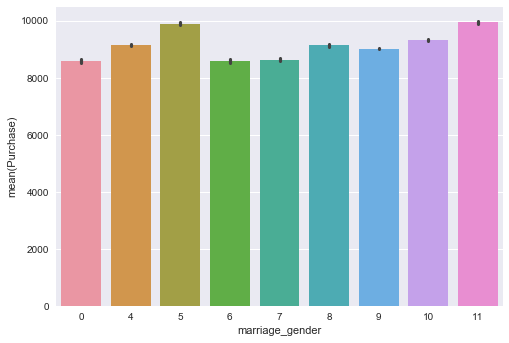

In [35]:
sns.barplot(x="marriage_gender",y="Purchase",data=train)
plt.show()

In [36]:
dictionary={"0":0,"6":0,"7":0,"4":1,"8":1,"9":1,"10":1,"5":2,"11":2}
train["marriage_gender"]=train["marriage_gender"].astype(str)
test["marriage_gender"]=test["marriage_gender"].astype(str)
combine=[train,test]
for i in combine:
    i["marriage_gender"]=i["marriage_gender"].map(dictionary)
train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,marriage_gender
0,1000001,1,1,3,1,2,0,5,5,3,8370,0
1,1000001,1,1,3,1,2,0,4,2,2,15200,0
2,1000001,1,1,3,1,2,0,9,5,3,1422,0
3,1000001,1,1,3,1,2,0,9,5,3,1057,0
4,1000002,2,2,1,3,4+,0,6,5,3,7969,2


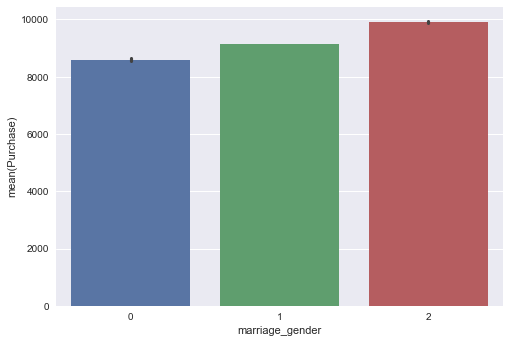

In [37]:
sns.barplot(x="marriage_gender",y="Purchase",data=train)
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)
  """


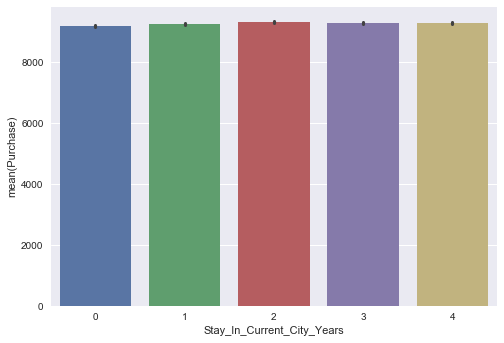

In [38]:
train["Stay_In_Current_City_Years"]=train["Stay_In_Current_City_Years"].astype(str)
test["Stay_In_Current_City_Years"]=test["Stay_In_Current_City_Years"].astype(str)
combine=[train,test]
for dataset in combine:
    dataset['Stay_In_Current_City_Years']=dataset.Stay_In_Current_City_Years.str.extract('([0-9])')
    
train["Stay_In_Current_City_Years"]=train["Stay_In_Current_City_Years"].astype(int)
test["Stay_In_Current_City_Years"]=test["Stay_In_Current_City_Years"].astype(int)
sns.barplot(x="Stay_In_Current_City_Years",y="Purchase",data=train)
plt.show()


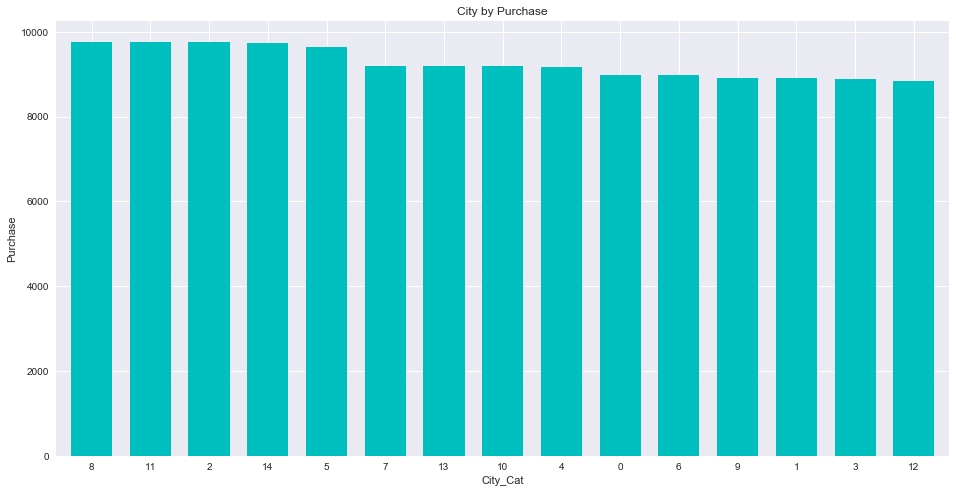

In [39]:
train["City_Cat"]=train["City_Category"]
test["City_Cat"]=test["City_Category"]
combine=[train,test]
for data in combine:
    data.loc[(data["Stay_In_Current_City_Years"]==0) & (data["City_Category"]==1),"City_Cat"]=0
    data.loc[(data["Stay_In_Current_City_Years"]==0) & (data["City_Category"]==2),"City_Cat"]=1
    data.loc[(data["Stay_In_Current_City_Years"]==0) & (data["City_Category"]==3),"City_Cat"]=2
    data.loc[(data["Stay_In_Current_City_Years"]==1) & (data["City_Category"]==1),"City_Cat"]=3
    data.loc[(data["Stay_In_Current_City_Years"]==1) & (data["City_Category"]==2),"City_Cat"]=4
    data.loc[(data["Stay_In_Current_City_Years"]==1) & (data["City_Category"]==3),"City_Cat"]=5
    data.loc[(data["Stay_In_Current_City_Years"]==2) & (data["City_Category"]==1),"City_Cat"]=6
    data.loc[(data["Stay_In_Current_City_Years"]==2) & (data["City_Category"]==2),"City_Cat"]=7
    data.loc[(data["Stay_In_Current_City_Years"]==2) & (data["City_Category"]==3),"City_Cat"]=8
    data.loc[(data["Stay_In_Current_City_Years"]==3) & (data["City_Category"]==1),"City_Cat"]=9
    data.loc[(data["Stay_In_Current_City_Years"]==3) & (data["City_Category"]==2),"City_Cat"]=10
    data.loc[(data["Stay_In_Current_City_Years"]==3) & (data["City_Category"]==3),"City_Cat"]=11
    data.loc[(data["Stay_In_Current_City_Years"]==4) & (data["City_Category"]==1),"City_Cat"]=12
    data.loc[(data["Stay_In_Current_City_Years"]==4) & (data["City_Category"]==2),"City_Cat"]=13
    data.loc[(data["Stay_In_Current_City_Years"]==4) & (data["City_Category"]==3),"City_Cat"]=14
    
fig = plt.figure(figsize=(16,8))
ax = fig.add_subplot(111)
x=train.groupby('City_Cat').mean().sort_values(by='Purchase', ascending=False)['Purchase'].plot('bar', color='c',width=0.7,title='City by Purchase', fontsize=10)
plt.xticks(rotation = 0)
plt.ylabel('Purchase')
#sns.barplot(x="City_Cat",y="Purchase",data=train)
plt.show()

In [40]:
dictionary={"8":0,"11":0,"2":0,"14":0,"5":0,"7":1,"13":1,"10":1,"4":1,"0":2,"6":2,"9":2,"1":2,"3":2,"12":2}
train["City_Cat"]=train["City_Cat"].astype(str)
test["City_Cat"]=test["City_Cat"].astype(str)
combine=[train,test]
for i in combine:
    i["City_Cat"]=i["City_Cat"].map(dictionary)
train.head()

,User_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,marriage_gender,City_Cat
0,1000001,1,1,3,1,2,0,5,5,3,8370,0,2
1,1000001,1,1,3,1,2,0,4,2,2,15200,0,2
2,1000001,1,1,3,1,2,0,9,5,3,1422,0,2
3,1000001,1,1,3,1,2,0,9,5,3,1057,0,2
4,1000002,2,2,1,3,4,0,6,5,3,7969,2,0


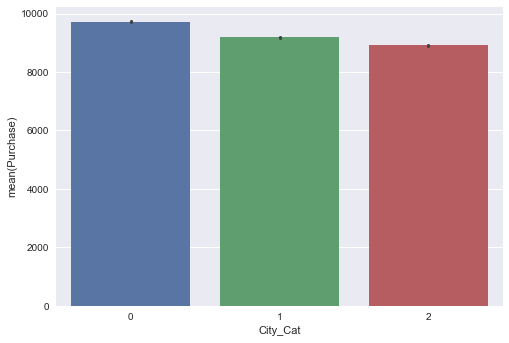

In [41]:
sns.barplot(x="City_Cat",y="Purchase",data=train)
plt.show()

In [42]:
train=train.drop(["Gender","Marital_Status","City_Category","Stay_In_Current_City_Years"],axis=1)
test=test.drop(["Gender","Marital_Status","City_Category","Stay_In_Current_City_Years"],axis=1)



In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
train.head()

,User_ID,Age,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,marriage_gender,City_Cat
0,1000001,1,3,5,5,3,8370,0,2
1,1000001,1,3,4,2,2,15200,0,2
2,1000001,1,3,9,5,3,1422,0,2
3,1000001,1,3,9,5,3,1057,0,2
4,1000002,2,1,6,5,3,7969,2,0


In [44]:
X_train = train.drop("Purchase", axis=1)
Y_train = train["Purchase"]
X_test  = test.drop("Product_ID", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((550068, 8), (550068,), (233599, 8))

In [45]:
logreg = LinearRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

0.61046296543696998

In [46]:
rf=RandomForestRegressor()
rf.fit(X_train,Y_train)
Y_Pred=rf.predict(X_test)
rf.score(X_train,Y_train)

0.77875244257585718

In [47]:
submission = pd.DataFrame({
        "User_ID": test["User_ID"],
        "Product_ID": test["Product_ID"],
        "Purchase": Y_pred
    })

In [48]:
submission.to_csv("submission_black.csv",sep=',',index=False)